# Quantification: material fraction

An example of block-wise quantification. Here we quantify material fraction so processing is very simple. 

Processing block 700,700,700                                                                                                    

Processing block 700,700,700                                                                                                    



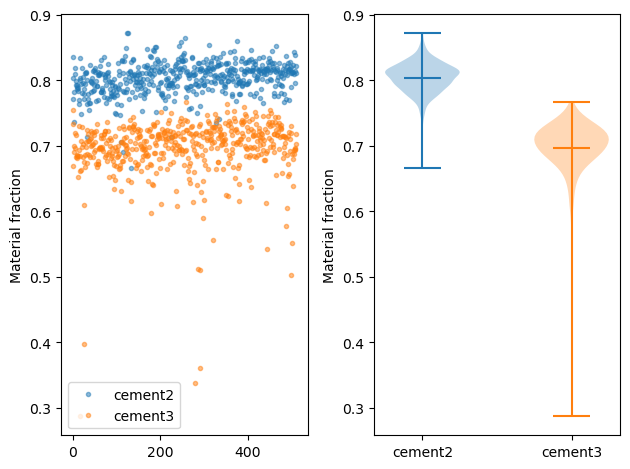

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tifffile

vol2 = tifffile.imread('cement_data/cement2.tif')
vol3 = tifffile.imread('porosity_data/cement3.tif')

def blockwise_density(vol, s):    
    # If processing involved filtering, it should be done block-wise,
    # for thresholding we can process the whole volume at once. 
    threshold = 80
    vol = vol > threshold
    X, Y, Z = vol.shape
    stats = []
    for x in range(0, X, s):
        for y in range(0, Y, s):
            for z in range(0, Z, s):
                print(f'\rProcessing block {x},{y},{z}', end=' '*100)
                subvol = vol[x:x+s, y:y+s, z:z+s]
                stats.append(subvol.sum()/subvol.size) 
    print('\n')
    return stats

density2 = blockwise_density(vol2, 100)
density3 = blockwise_density(vol3, 100)

fig, ax = plt.subplots(1, 2)
ax[0].plot(density2, '.', alpha=0.5)
ax[0].plot(density3, '.', alpha=0.5)
ax[0].legend(['cement2', 'cement3'])
ax[0].set_ylabel('Material fraction')
ax[1].violinplot(density2, positions=[1], showmeans=True)
ax[1].violinplot(density3, positions=[2], showmeans=True)
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['cement2', 'cement3'])
ax[1].set_ylabel('Material fraction')
fig.tight_layout()

plt.show()

